In [10]:
from pycirclize import Circos
from pycirclize.parser import Gff
from pycirclize.utils import load_prokaryote_example_file

gene_final_GFF
247249719
[SeqFeature(SimpleLocation(ExactPosition(39109152), ExactPosition(41523062), strand=1), type='amp', id='chr1', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(148646435), ExactPosition(149486905), strand=1), type='amp', id='chr1', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(232526849), ExactPosition(233617929), strand=1), type='amp', id='chr1', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(154088695), ExactPosition(154329131), strand=1), type='amp', id='chr1', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(36338556), ExactPosition(36480225), strand=1), type='amp', id='chr1', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(178780207), ExactPosition(178854243), strand=1), type='amp', id='chr1', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(241440101), ExactPosition(247249719), strand=1), type='amp', id='chr1', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(1095520), ExactPosition(1467046), s

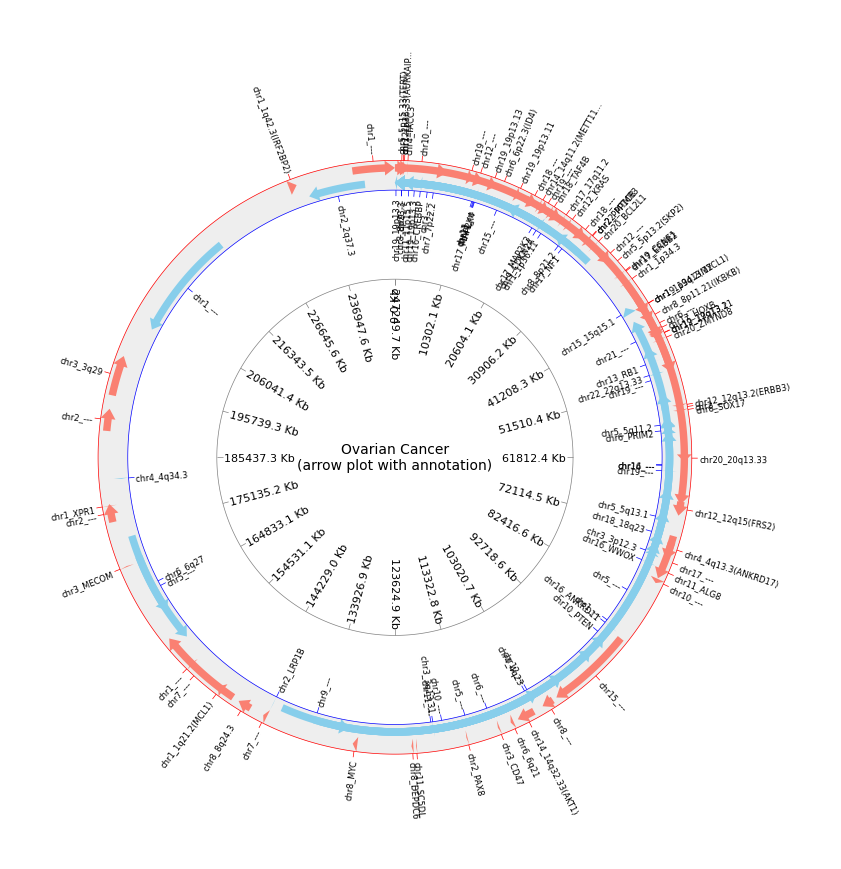

In [11]:
pl = Gff("./gene_final_GFF.gff")
print(pl.name)
print(pl.range_size)

circos = Circos(sectors={pl.name: pl.range_size})
circos.text("Ovarian Cancer\n(arrow plot with annotation)", size=10)


sector = circos.sectors[0]
cds_track = sector.add_track((90, 100))
cds_track.axis(fc="#EEEEEE", ec="none")

f_cds_feats = pl.extract_features("amp", target_strand=1)
print(f_cds_feats)
print(len(f_cds_feats))
cds_track.genomic_features(f_cds_feats, plotstyle="arrow", r_lim=(95, 100), fc="salmon")

r_cds_feats = pl.extract_features("del", target_strand=-1)
print(r_cds_feats)
print(len(r_cds_feats))
cds_track.genomic_features(r_cds_feats, plotstyle="arrow", r_lim=(90, 95), fc="skyblue")


amp_pos_list, amp_labels = [], []
for feat in pl.extract_features("amp"):
    start, end = int(str(feat.location.end)), int(str(feat.location.start))
    pos = (start + end) / 2
    label = feat.qualifiers.get("comments", [""])[0]
    if len(label) > 20:
        label = label[:20] + "..."
    amp_pos_list.append(pos)
    amp_labels.append(label)


del_pos_list, del_labels = [], []
for feat in pl.extract_features("del"):
    start, end = int(str(feat.location.end)), int(str(feat.location.start))
    pos = (start + end) / 2
    label = feat.qualifiers.get("comments", [""])[0]
    if len(label) > 20:
        label = label[:20] + "..."
    del_pos_list.append(pos)
    del_labels.append(label)

# plot labels for amplification gene
cds_track.xticks(
    amp_pos_list,
    amp_labels,
    outer=True,
    label_orientation="vertical",
    show_bottom_line=True,
    label_size=6,
    line_kws=dict(ec="red"),
)

# plot labels for deletion gene
cds_track.xticks(
    del_pos_list,
    del_labels,
    outer=False,
    label_orientation="vertical",
    show_bottom_line=True,
    label_size=6,
    line_kws=dict(ec="blue"),
)

cds_track = sector.add_track((60, 70))
#cds_track.axis(fc="#EEEEEE", ec="none")

# Plot xticks & intervals on inner position
cds_track.xticks_by_interval(
    interval=10302071,
    outer=False,
    show_bottom_line=True,
    label_formatter=lambda v: f"{v/ 1000:.1f} Kb",
    label_orientation="vertical",
    line_kws=dict(ec="grey"),
)

fig = circos.plotfig()